# Fashion-MNIST & LeNet-5 implementation

FashionMNIST 是一個替代 MNIST 手寫數字集的圖像數據集。它是由 Zalando（一家德國的時尚科技公司）旗下的研究部門提供。其涵蓋了來自 10 種類別的共 7 萬個不同商品的正面圖片。 FashionMNIST 的大小、格式和訓練集/測試集劃分與原始的 MNIST 完全一致。 60000/10000 的訓練測試數據劃分，28x28 的灰度圖片。你可以直接用它來測試你的機器學習和深度學習算法性能，且不需要改動任何的程式。


<center><img src="https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp" width="75%" height="75%"/></center>

In [1]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import scipy.stats
import heapq

# from torch import nn
# from torchvision import datasets
# from torchvision import transforms
# from torch.utils.data import DataLoader
from scipy.interpolate import interp1d

# # change the max. print value
# np.set_printoptions(threshold=1000000, suppress=True)

# torch.manual_seed(1)
# torch.cuda.manual_seed_all(1)

In [2]:
# transform = transforms.Compose([
# #     transforms.RandomResizedCrop(224),# 對圖像進行隨機裁減
# #     transforms.RandomRotation(20),# 對圖像進行隨機旋轉
# #     transforms.RandomHorizontalFlip(p=0.5),# 對圖像進行隨機水平翻轉
#     transforms.Grayscale(num_output_channels=1),
#     transforms.ToTensor()# 變成tensor格式
# #     transforms.Normalize(
# #         mean=[0.485, 0.456, 0.406],
# #         std=[0.229, 0.224, 0.225])
# ])

# root = "./data/custom/MNIST_Fashion"
# train_data = datasets.ImageFolder(root + "/train",transform)
# test_data = datasets.ImageFolder(root + "/test",transform)

In [3]:
# batch_size = 256

# # For training
# train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
# test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# # For preprocessing
# feature_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)

In [4]:
# classes = train_data.classes
# classes_index = train_data.class_to_idx
# print(classes)
# print(classes_index)

In [5]:
# # Change the device to GPU

# # device = "cuda" if torch.cuda.is_available() else "cpu"
# device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
# print(f"Using {device} device")

In [6]:
# # Show Data Structure, generate data in parallel with PyTorch
# for X, y in train_dataloader:
#     print(f"Shape of X [N, C, H, W]: {X.shape}")
#     print(f"Shape of y: {y.shape} {y.dtype}")
#     break

In [7]:
# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet, self).__init__()
#         self.features = nn.Sequential(
#             # nn.Conv2d(1,6,5,1,2): 通道數，輸出數，捲積，步長，在圖片旁邊補0(幾圈)
#             nn.Conv2d(1,6,5,1,2), # C1:6@28*28
#             nn.Tanh(), 
#             nn.MaxPool2d(2,2), # S2:6@14*14
#             nn.Conv2d(6,16,5), # C3:16@10*10
#             nn.Tanh(),
#             nn.MaxPool2d(2,2), # S4:16@5*5
#         )
#         self.classifier = nn.Sequential(
#             nn.Linear(16*5*5,120), # C5:120
#             nn.Sigmoid(),
#             nn.Linear(120,84), # F6:84
#             nn.Sigmoid(),
#             nn.Linear(84,10) # Output:10 (class[0]~[9])
#         )
#     def forward(self,x):
#         x = self.features(x)
#         x = x.view(x.size()[0],-1)
#         x = self.classifier(x)
#         return x

In [8]:
# class FeatureExtractor(nn.Module):
#     def __init__(self, model):
#         super(FeatureExtractor, self).__init__()
#         # Extract Net Feature Layers
#         self.features = list(model.features)
#         self.features = nn.Sequential(*self.features)
#         # Convert the image into one-dimensional vector
#         self.flatten = nn.Flatten()
#         # Extract the first part of fully-connected layer from Net
#         self.cs0 = model.classifier[0]
#         self.cs1 = model.classifier[1]
#         self.cs2 = model.classifier[2]
#     def forward(self, x):
#         # It will take the input 'x' until it returns the feature vector called 'out'
#         out = self.features(x)
#         out = self.flatten(out)
#         out = self.cs0(out)
#         out = self.cs1(out) 
#         out = self.cs2(out) 
#         return out 

# # Initialize the model
# model = LeNet()
# new_model = FeatureExtractor(model).to(device)

In [9]:
# features = []
# step = 64
# size = len(feature_dataloader.dataset)
# model.train()
# for batch, (X, y) in enumerate(feature_dataloader):
#     X = X.to(device)
#     sX = X[:len(X)-1:step]
#     model.eval() 
#     with torch.no_grad():
#         feature = new_model(sX)
#     if batch % 100 == 0: 
#         current = batch * len(X)
#         print(f"Feature Extractor: [{current:>5d}/{size:>5d}]")   
#     features.append(feature.cpu().detach().numpy())    

In [10]:
# # Convert to NumPy Array
# np.warnings.filterwarnings('ignore', category = np.VisibleDeprecationWarning)
# featuresdata = np.array(features)
# import itertools
# featureslist =list(itertools.chain(*featuresdata))

# # print(f"batch_size/step: {batch_size/step}",f"\n")
# # print(f"batch[0]: ",len(featuresdata[0]))

# out_features = model.classifier[2].out_features
# print(f"Theoretical Value: {len(featuresdata[0]) * (len(featuresdata)-1) + len(featuresdata[234])}" )
# print(f"Actual value: {len(featureslist)}")
# print(f"Theoretical out_features:", out_features)
# print(f"Actual out_features: {len(featureslist[0])}")

In [11]:
# j = 0
# cutlist = []

# for j in range (out_features):
#     for i in range (len(featureslist)):
#         cutlist.append(featureslist[i][j])
        
# cutlist = np.array(cutlist)
# cutlist = cutlist.reshape(len(featureslist[0]), len(featureslist))
# cutlist = np.sort(cutlist)
# np.save("20221217.npy",cutlist)

In [12]:
cutlist = np.load("20221217.npy")

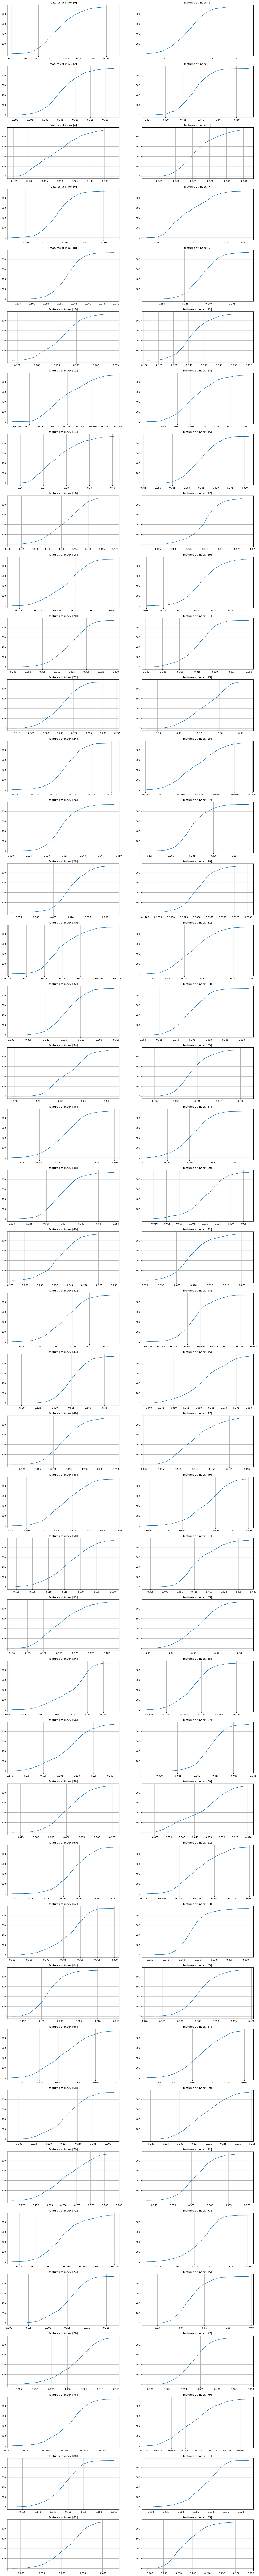

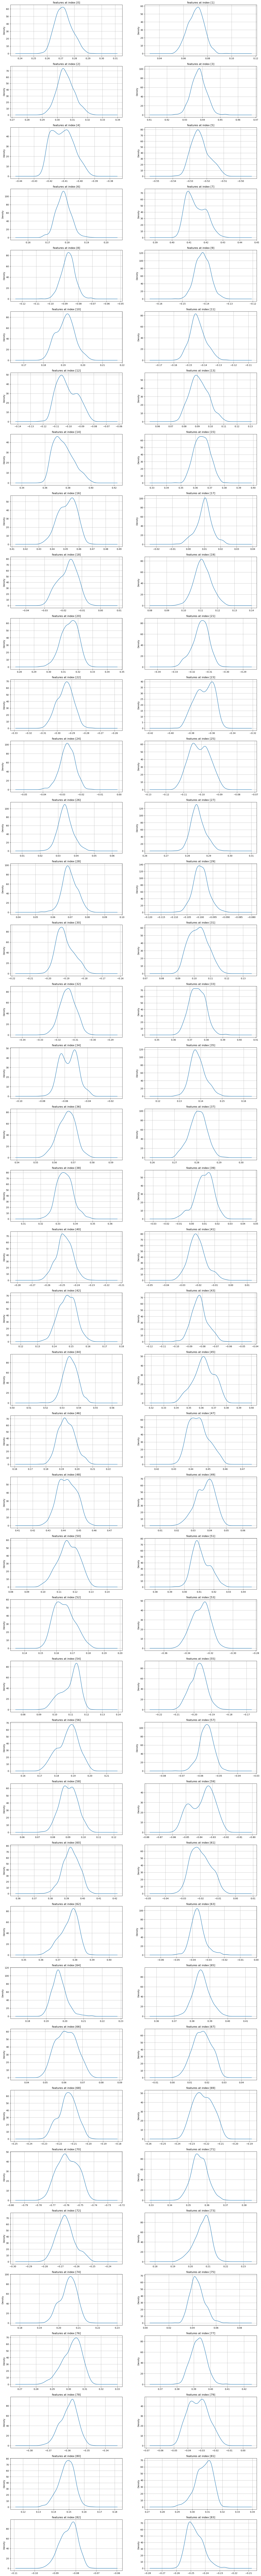

In [13]:
Y = np.linspace(0, (len(cutlist[0])-1), len(cutlist[0]))
num = 0
figh=int(5*len(cutlist)/2)

f1 = plt.figure(figsize=(20,figh))
for cnt in range (len(cutlist)):
    num= num + 1
    plt.subplot(int(len(cutlist)/2) ,2,num)
    plt.plot(cutlist[cnt], Y)
    plt.title(f"features at index [{cnt}]")
    plt.grid(True)
plt.show()

num = 0
f2 = plt.figure(figsize=(20,figh))
for cnt in range (len(cutlist)):
    num= num + 1
    plt.subplot(int(len(cutlist)/2) ,2,num)
    cutlist_pd = pd.Series(cutlist[cnt])
    cutlist_pd.plot(kind='kde')
    plt.title(f"features at index [{cnt}]")
    plt.grid(True)
plt.show()

In [14]:
# The Kolmogorov-Smirnov(Kolmogorov-Smirnov) test should only be used for large sample numbers (>300)
# fixed Bug: https://www.cnblogs.com/eat-drink-breathe-hard/p/13798547.html
# more test method ref: https://zhuanlan.zhihu.com/p/296825777

kstest_list = []
for cnt in range (len(cutlist)):
    test = cutlist[cnt]
    kstest = scipy.stats.kstest(test, 'norm', args=(test.mean(),test.std()))[1]
    kstest_list.append(kstest)

kstest_np = np.array(kstest_list)
kstest_pvalue_10 = heapq.nsmallest(10, range(len(kstest_np)), kstest_np.take)
print(kstest_pvalue_10)


[54, 62, 7, 30, 51, 59, 12, 23, 63, 14]


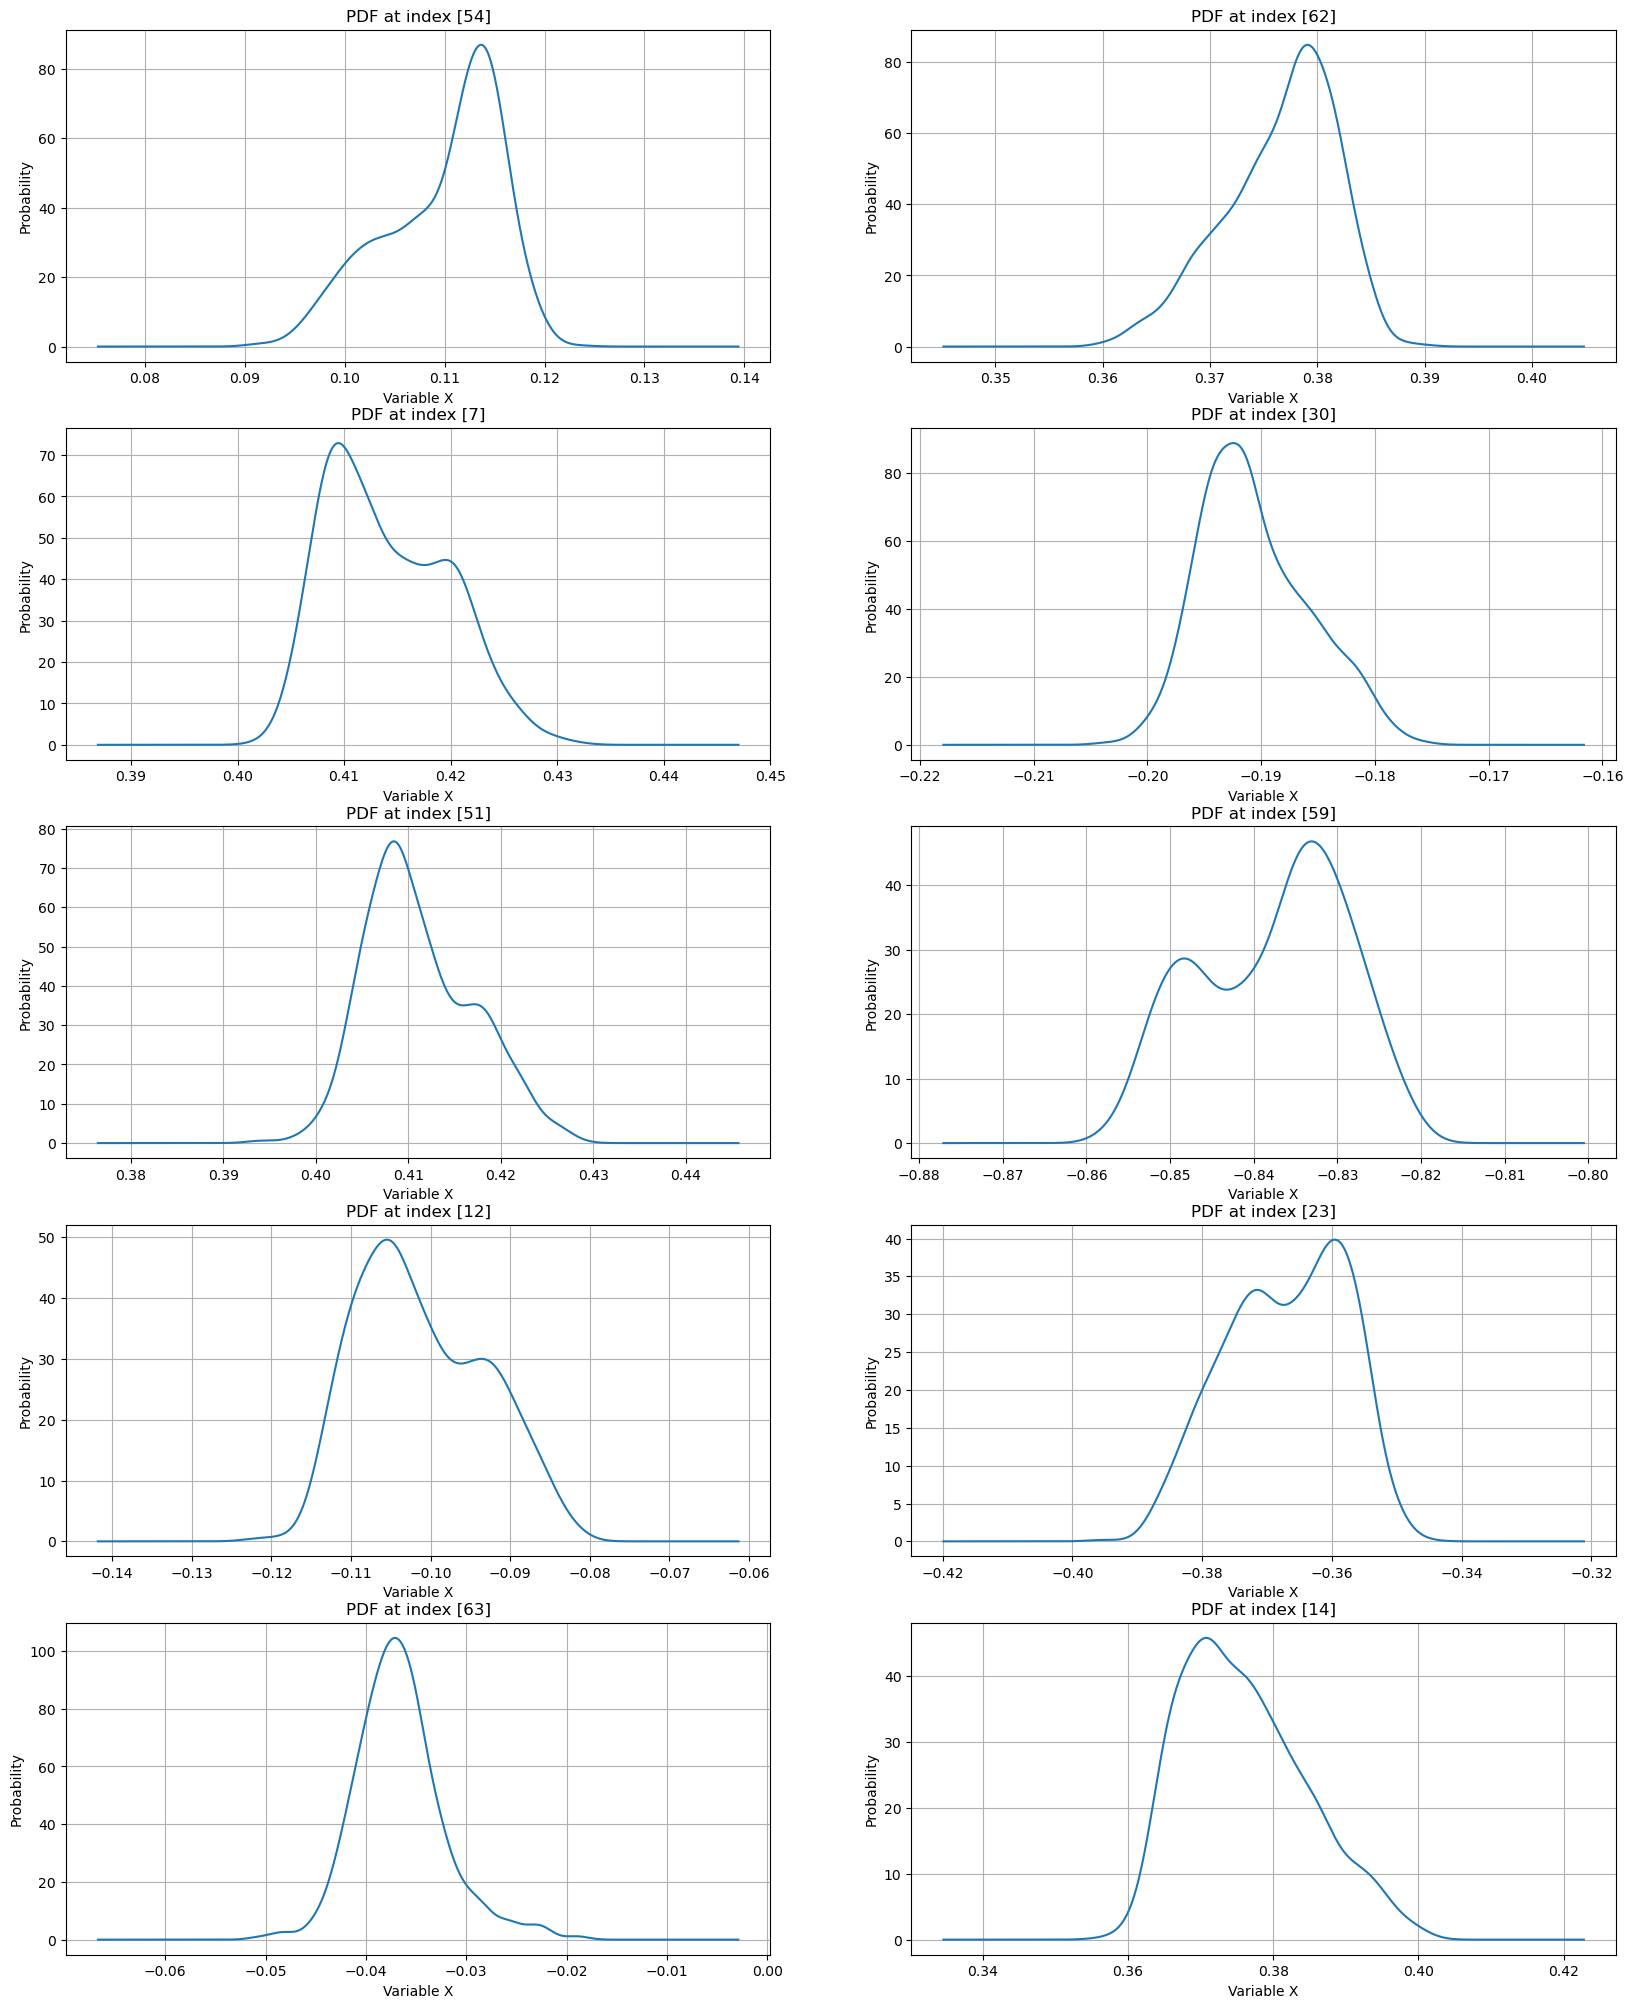

In [15]:
num = 0

f1 = plt.figure(figsize=(20, int(5*len(kstest_pvalue_10)/2)))
for cnt in kstest_pvalue_10:
    num= num + 1
    plt.subplot(int(len(kstest_pvalue_10)/2) ,2,num)
    cutlist_pd = pd.Series(cutlist[cnt])
    cutlist_pd.plot(kind='kde')
    plt.title(f"PDF at index [{cnt}]")
    plt.ylabel("Probability")
    plt.xlabel("Variable X")
    plt.grid(True)
plt.show()

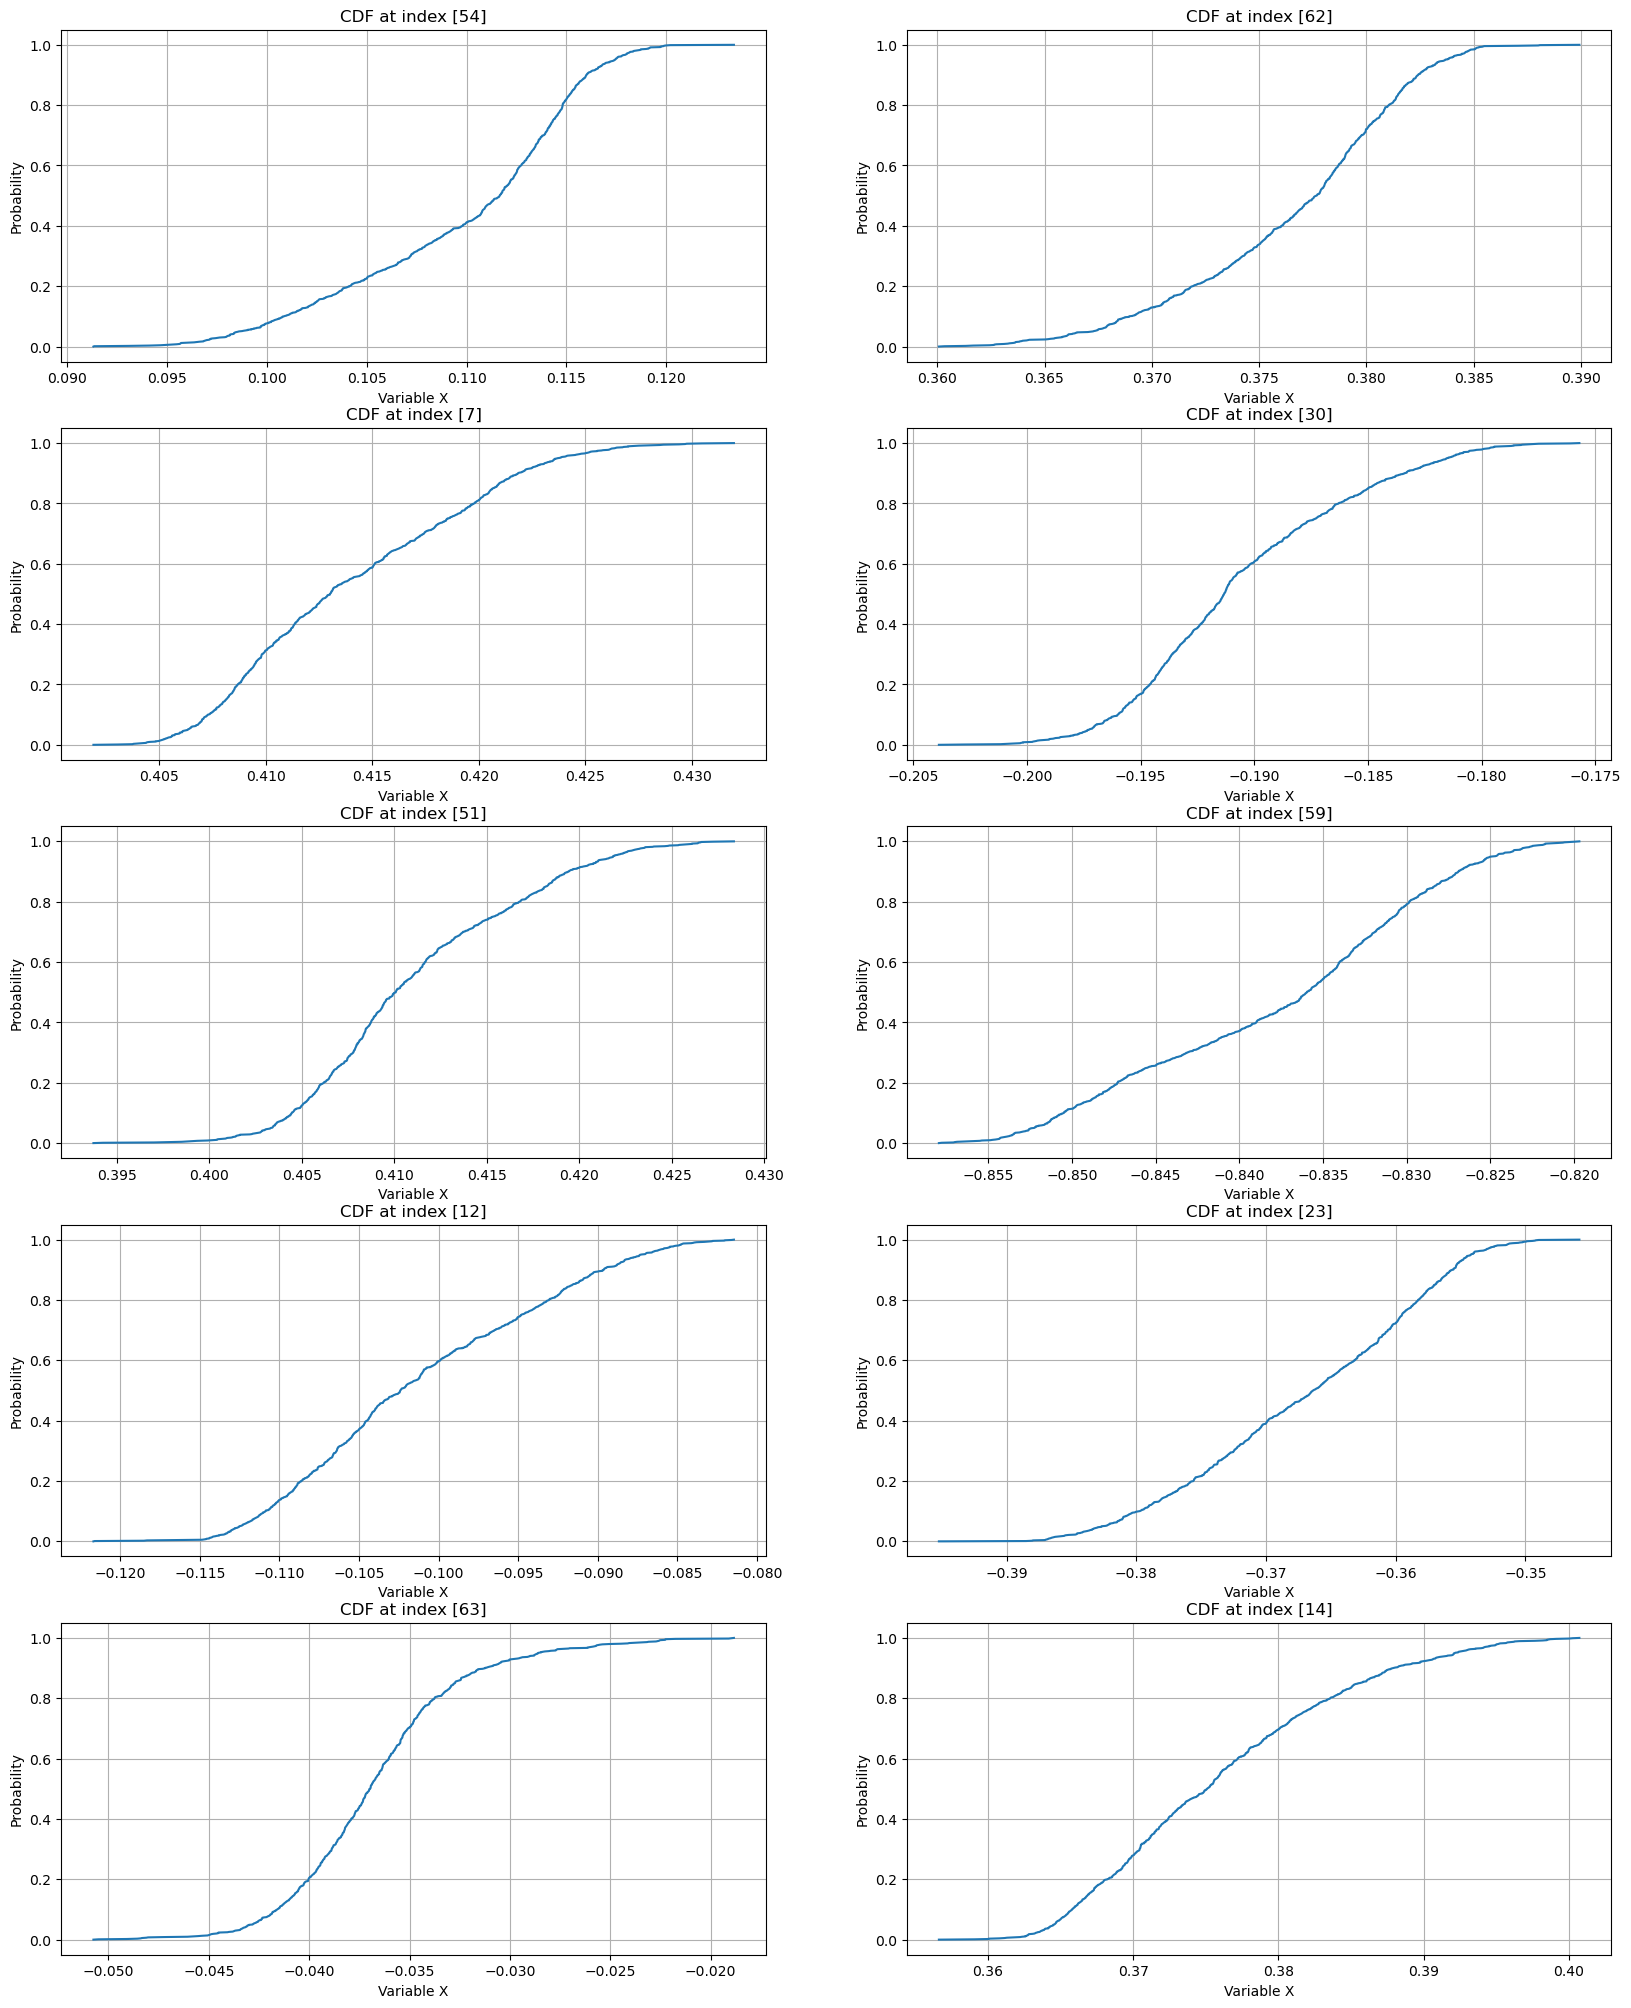

In [16]:
num = 0 
f2=plt.figure(figsize=(20,25))
Y = np.linspace(0, 1, len(cutlist[0]))
for cnt in kstest_pvalue_10:
    num= num + 1
    plt.subplot(int(len(kstest_pvalue_10)/2),2,num)
    plt.plot(cutlist[cnt], Y)
    plt.title(f"CDF at index [{cnt}]")
    plt.ylabel("Probability")
    plt.xlabel("Variable X")
    plt.grid(True)
plt.show()

In [17]:
def pointfunction(data):
    return fx(data)    
def pointslope(m,bias,data):  
    return (2**m) * data + bias
def intercept(data):
    return pointfunction(data)-pointslope(m,bias,data)

xs = Y
ys = cutlist[59]

fx = interp1d(xs, ys , kind='linear', fill_value="extrapolate")
xInterp = np.linspace(0,1,10000)
yInterp = fx(xInterp)

L, R = 0, 1
W = R - L
N = 100

X1 = np.linspace(L, R, N)
d1= np.gradient(pointfunction(X1))
d2= np.gradient(np.gradient(pointfunction(X1)))

eps_d2 = np.where(np.diff(np.sign(np.diff(d2))))[0]
boundary = np.append([0],[N])
All_b = np.sort(np.concatenate((boundary, eps_d2)))
All_b = L+(All_b*W)/N

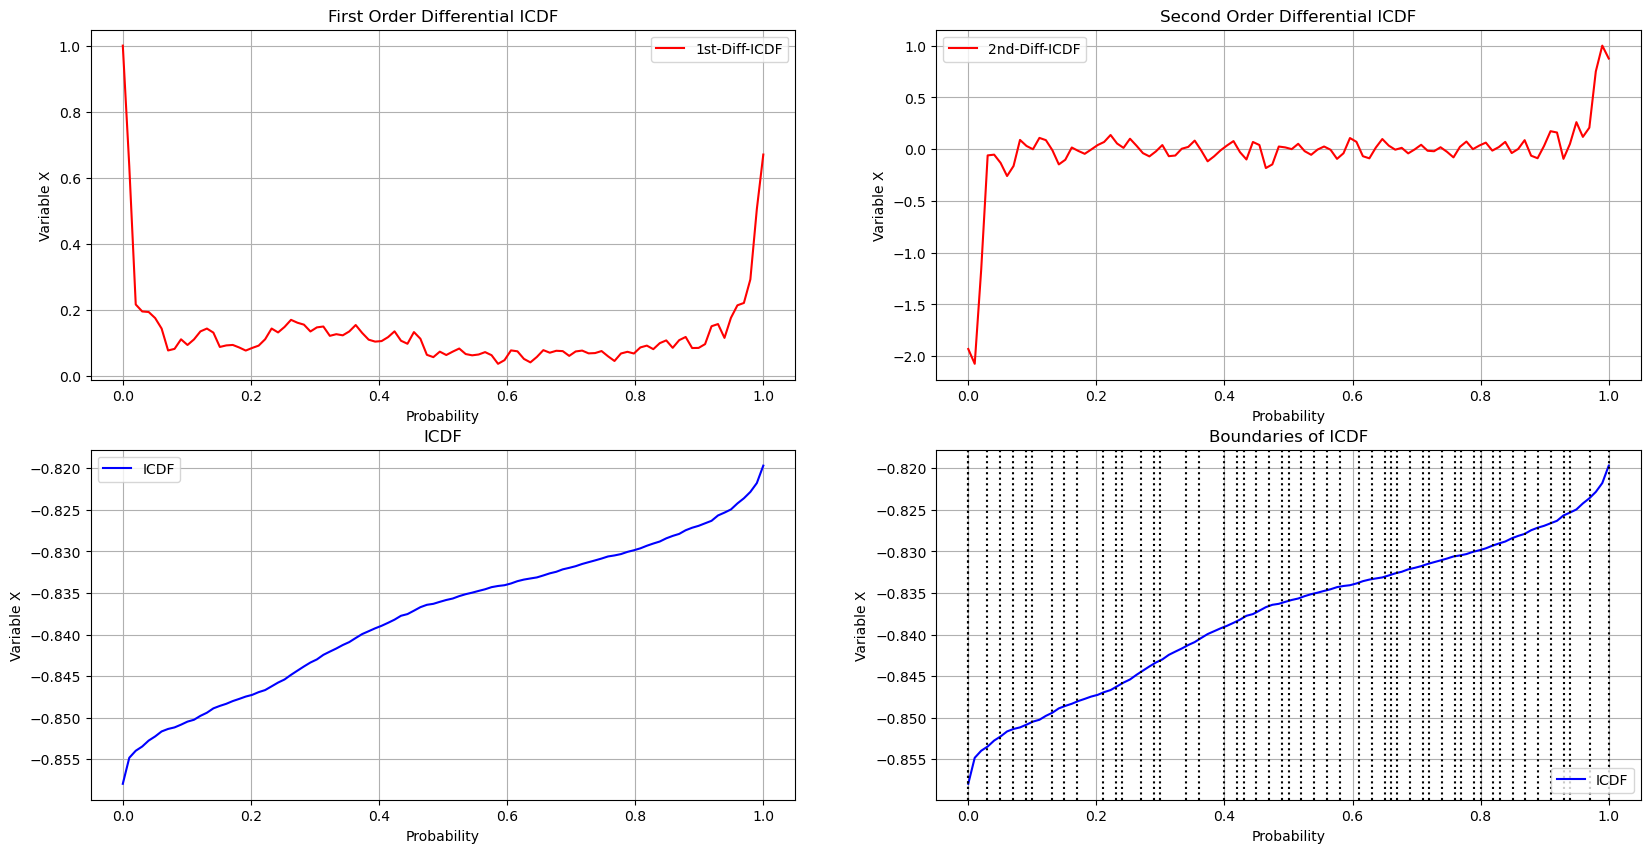

In [18]:
# plot
f1 = plt.figure(figsize=(20,10))
ax1 = f1.add_subplot(221)
ax1.plot(X1,d1/np.max(d1), color="r", label="1st-Diff-ICDF")
plt.title("First Order Differential ICDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

ax2 = f1.add_subplot(222)
ax2.plot(X1,d2/np.max(d2), color="r", label="2nd-Diff-ICDF")
plt.title("Second Order Differential ICDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

ax3 = f1.add_subplot(223)
ax3.plot(X1,pointfunction(X1), color="b", label="ICDF")
plt.title("ICDF")
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)

ax4 = f1.add_subplot(224)
ax4.plot(X1,pointfunction(X1), color="b", label="ICDF")
for i, j in enumerate(All_b, 1):
    plt.axvline(x = j, color='black', linestyle=":")
    
plt.title('Boundaries of ICDF')
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# p = precision, n(nR,nL) = new, m = slpoe, c = center
# ans = approximate solution
# list1 = temp list 1. and so on. ev = error value
# for range of area, ud=undo

p = 1e-6
ans = []
area = 0
error_rate = 5e-5

for i in range(len(All_b)-1):
    list1, list2, list3, ud_area = [], [], [], []
    area += 1
    list2_ev = 1
    bL = All_b[i]
    bR = All_b[i+1]
    nL = bL
    nR = bR
    ud_area.append([bL,bR])
    print("------------------------------")
    print("|",'Area:',area,'Range:',bL,'~',bR,"|")
    print("------------------------------")
    
    while len(ud_area) != 0:
        ud_area.pop(0)
#         print("*Remaining range:")
#         print(np.around(ud_area,4))
        print("*now do: ",round(nL,6),"~",round(nR,6))
        while list2_ev > error_rate:
            list1, list2= [], []
            for j in range(-8,8):
                m = j
                c = (nL+nR)/2
                bias = pointfunction(c)-2**m*(c)
                X1 = np.arange(nL, nR + p, p)
                err_L = abs(pointfunction(min(X1)) - (2**m)*min(X1)-bias)
                err_R = abs((2**m)*max(X1)+bias - pointfunction(max(X1)))
                err = (err_L + err_R)/2
                list1.append([err,m,c,bias,nL,nR])
                list1.sort(key = lambda s:s[0])
              
            list2 = np.array(list1)[0]
#             print("output the smallest array: ", list2)
            list2_ev =list2[0]
            distance = round(c-nL,6)
            nL= nL + distance/2
            nR= nR - distance/2
            
        ans.append(list1[0][1:])
        ans.sort(key = lambda s:s[3])
        
        print("ans: ")
        print(np.around(ans,4))
        print("################################################")
        
        if bL == nL-distance/2:
            pass
        else:
            list3=[]
            list2_ev = 1
            list3.append([bL,nL-distance/2])
            list3.append([nR+distance/2,bR])
        
            list3.sort(key = lambda s:s[0])
            ud_area += list3
#             print("*undo_Array:")
#             print(np.around(ud_area,4))
            
        if len(ud_area) == 0:
            pass
        else:
            list2_ev = 1
            nL = ud_area[0][0]
            nR = ud_area[0][1]
            bL = nL
            bR = nR

------------------------------
| Area: 1 Range: 0.0 ~ 0.0 |
------------------------------
*now do:  0.0 ~ 0.0
ans: 
[[-8.     0.    -0.858  0.     0.   ]]
################################################
------------------------------
| Area: 2 Range: 0.0 ~ 0.03 |
------------------------------
*now do:  0.0 ~ 0.03
ans: 
[[-8.      0.     -0.858   0.      0.    ]
 [-5.      0.015  -0.8548  0.0131  0.0169]]
################################################
*now do:  0.0 ~ 0.013125
ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]]
################################################
*now do:  0.016875 ~ 0.03
ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000e+00  2.340e-02 -8.552e-01  2.180e-02  2.510e-02]]
####################

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.000e+00  0.000e+00 -8.580e-01  0.000e+00  0.000e+00]
 [-3.000e+00  5.000e-04 -8.579e-01  0.000e+00  1.000e-03]
 [-1.000e+00  1.200e-03 -8.583e-01  1.000e-03  1.300e-03]
 [-1.000e+00  1.400e-03 -8.583e-01  1.300e-03  1.600e-03]
 [-1.000e+00  1.800e-03 -8.582e-01  1.600e-03  2.100e-03]
 [-4.000e+00  2.200e-03 -8.572e-01  2.100e-03  2.300e-03]
 [-4.000e+00  3.100e-03 -8.572e-01  2.300e-03  3.800e-03]
 [-2.000e+00  4.100e-03 -8.579e-01  3.800e-03  4.400e-03]
 [-1.000e+00  5.000e-03 -8.590e-01  4.400e-03  5.600e-03]
 [-1.000e+00  5.900e-03 -8.590e-01  5.600e-03  6.200e-03]
 [-2.000e+00  6.600e-03 -8.574e-01  6.200e-03  7.000e-03]
 [-3.000e+00  7.500e-03 -8.564e-01  7.000e-03  8.000e-03]
 [-3.000e+00  8.300e-03 -8.565e-01  8.000e-03  8.700e-03]
 [-1.000e+00  9.200e-03 -8.597e-01  8.700e-03  9.700e-03]
 [-3.000e+00  1.000e-02 -8.561e-01  9.700e-03  1.040e-02]
 [-3.000e+00  1.180e-02 -8.561e-01  1.040e-02  1.310e-02]
 [-5.000e+00  1.500e-02 -8.548e-01  1.310e-02  1.690e-02]
 [-4.000

ans: 
[[-8.0000e+00  0.0000e+00 -8.5800e-01  0.0000e+00  0.0000e+00]
 [-3.0000e+00  5.0000e-04 -8.5790e-01  0.0000e+00  1.0000e-03]
 [-1.0000e+00  1.2000e-03 -8.5830e-01  1.0000e-03  1.3000e-03]
 [-1.0000e+00  1.4000e-03 -8.5830e-01  1.3000e-03  1.6000e-03]
 [-1.0000e+00  1.8000e-03 -8.5820e-01  1.6000e-03  2.1000e-03]
 [-4.0000e+00  2.2000e-03 -8.5720e-01  2.1000e-03  2.3000e-03]
 [-4.0000e+00  3.1000e-03 -8.5720e-01  2.3000e-03  3.8000e-03]
 [-2.0000e+00  4.1000e-03 -8.5790e-01  3.8000e-03  4.4000e-03]
 [-1.0000e+00  5.0000e-03 -8.5900e-01  4.4000e-03  5.6000e-03]
 [-1.0000e+00  5.9000e-03 -8.5900e-01  5.6000e-03  6.2000e-03]
 [-2.0000e+00  6.6000e-03 -8.5740e-01  6.2000e-03  7.0000e-03]
 [-3.0000e+00  7.5000e-03 -8.5640e-01  7.0000e-03  8.0000e-03]
 [-3.0000e+00  8.3000e-03 -8.5650e-01  8.0000e-03  8.7000e-03]
 [-1.0000e+00  9.2000e-03 -8.5970e-01  8.7000e-03  9.7000e-03]
 [-3.0000e+00  1.0000e-02 -8.5610e-01  9.7000e-03  1.0400e-02]
 [-3.0000e+00  1.1800e-02 -8.5610e-01  1.0400e-02

ans: 
[[-8.0000e+00  0.0000e+00 -8.5800e-01  0.0000e+00  0.0000e+00]
 [-3.0000e+00  5.0000e-04 -8.5790e-01  0.0000e+00  1.0000e-03]
 [-1.0000e+00  1.2000e-03 -8.5830e-01  1.0000e-03  1.3000e-03]
 [-1.0000e+00  1.4000e-03 -8.5830e-01  1.3000e-03  1.6000e-03]
 [-1.0000e+00  1.8000e-03 -8.5820e-01  1.6000e-03  2.1000e-03]
 [-4.0000e+00  2.2000e-03 -8.5720e-01  2.1000e-03  2.3000e-03]
 [-4.0000e+00  3.1000e-03 -8.5720e-01  2.3000e-03  3.8000e-03]
 [-2.0000e+00  4.1000e-03 -8.5790e-01  3.8000e-03  4.4000e-03]
 [-1.0000e+00  5.0000e-03 -8.5900e-01  4.4000e-03  5.6000e-03]
 [-1.0000e+00  5.9000e-03 -8.5900e-01  5.6000e-03  6.2000e-03]
 [-2.0000e+00  6.6000e-03 -8.5740e-01  6.2000e-03  7.0000e-03]
 [-3.0000e+00  7.5000e-03 -8.5640e-01  7.0000e-03  8.0000e-03]
 [-3.0000e+00  8.3000e-03 -8.5650e-01  8.0000e-03  8.7000e-03]
 [-1.0000e+00  9.2000e-03 -8.5970e-01  8.7000e-03  9.7000e-03]
 [-3.0000e+00  1.0000e-02 -8.5610e-01  9.7000e-03  1.0400e-02]
 [-3.0000e+00  1.1800e-02 -8.5610e-01  1.0400e-02

ans: 
[[-8.0000e+00  0.0000e+00 -8.5800e-01  0.0000e+00  0.0000e+00]
 [-3.0000e+00  5.0000e-04 -8.5790e-01  0.0000e+00  1.0000e-03]
 [-1.0000e+00  1.2000e-03 -8.5830e-01  1.0000e-03  1.3000e-03]
 ...
 [-6.0000e+00  9.9100e-01 -8.3720e-01  9.8970e-01  9.9230e-01]
 [-2.0000e+00  9.9270e-01 -1.0698e+00  9.9230e-01  9.9320e-01]
 [-2.0000e+00  9.9660e-01 -1.0697e+00  9.9320e-01  1.0000e+00]]
################################################
*now do:  0.97149 ~ 0.972384
ans: 
[[-8.0000e+00  0.0000e+00 -8.5800e-01  0.0000e+00  0.0000e+00]
 [-3.0000e+00  5.0000e-04 -8.5790e-01  0.0000e+00  1.0000e-03]
 [-1.0000e+00  1.2000e-03 -8.5830e-01  1.0000e-03  1.3000e-03]
 ...
 [-6.0000e+00  9.9100e-01 -8.3720e-01  9.8970e-01  9.9230e-01]
 [-2.0000e+00  9.9270e-01 -1.0698e+00  9.9230e-01  9.9320e-01]
 [-2.0000e+00  9.9660e-01 -1.0697e+00  9.9320e-01  1.0000e+00]]
################################################
*now do:  0.985468 ~ 0.986107
ans: 
[[-8.0000e+00  0.0000e+00 -8.5800e-01  0.0000e+00  0.0000

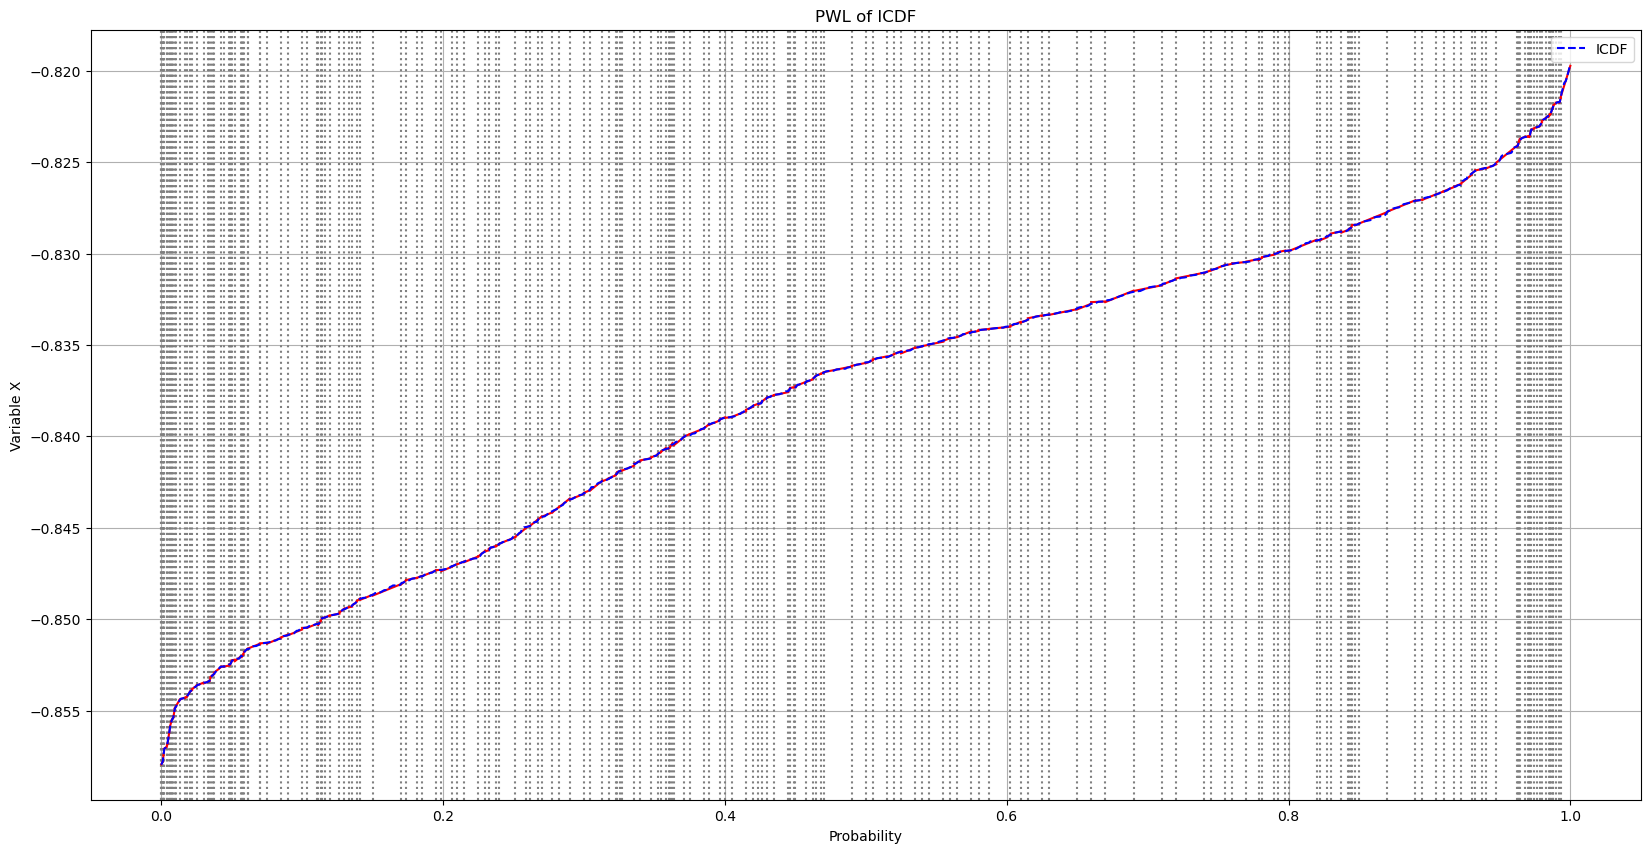

total PWL:  205
All Required ReLU:  409


In [20]:
# setting figsize
f1 = plt.figure(figsize=(20,10))


# print boundary
# for i, j in enumerate(All_b, 1):
#     plt.axvline(x = j, color='black', linestyle="-.")
for i in range(len(ans)):
    L = ans[i][3]
    plt.axvline(x = L, color='gray', linestyle=":")
# print the slope intercept
for i in range(len(ans)):
    nL = ans[i][3]
    nR = ans[i][4]
    m = ans[i][0]
    bias = ans[i][2]
    Xans = np.arange(nL, nR + p, p)
    Yans = (2**m)*Xans + bias
    plt.plot(Xans, Yans, color="red")
    
# print pointfunction
plt.plot(xInterp, yInterp, color="blue", label="ICDF", linestyle="--")
plt.title('PWL of ICDF')
plt.ylabel("Variable X")
plt.xlabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

print("total PWL: ",len(ans))
print("All Required ReLU: ", 2*len(ans)-1)

In [21]:
# lr = 1e-3
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# def train(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     model.train()
#     for batch, (X, y) in enumerate(dataloader):
#         X, y = X.to(device), y.to(device)

#         # Compute prediction error
#         pred = model(X)
#         loss = loss_fn(pred, y)

#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch % 100 == 0:
#             loss, current = loss.item(), batch * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# def test(dataloader, model, loss_fn):
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     model.eval()
#     test_loss, correct = 0, 0
#     with torch.no_grad():
#         for X, y in dataloader:
#             X, y = X.to(device), y.to(device)
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()
#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [22]:
# epochs = 10
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train(train_dataloader, model, loss_fn, optimizer)
#     test(test_dataloader, model, loss_fn)
# print("Done!")